## Cryptocurrency Project
Learning goal: By the end of this Capstone, you should be familiar with some of the ways to visually and numberically explore the data stored in a DataFrame.  In doing this we will use the cryptocurrency price data and gain familiarity with this kind of financial data.  

Agenda:

1. Introduction to the data science process
2. Gaining insights into data
  - Context for the data
  -	The Exploratory Process
  -	Understanding variables
  -	Exploring types, missing data and descriptive statistics
3. Developing analytics
4. Opertunities for Further Investigations

Warning: This is not financial advice.
This exercise is meant purely for educational purposes, uses many simplifications and is not intended, nor should be considered as financial advice. There are many risks involved in implementation of financial trading strategies that are not considered nor described here.



## 1. Introduction to the data science process

Data science is an iterative process.  One of the first issues a data scientist runs into with nearly every new data set is decoding the data.  Sometimes data comes with well defined schema such as in a database, but very often a new data source requires figuring out what the implied schema actually is.  Much as we wish life were not like this, very often a flat file (such as a csv or text file) is all we get.

When examining a new data set, we start with high-level information about what the dataset holds. We will look at the some of the more standard ways to investigate the data and then move on to the specific ways that we can look at financial data. As we explore our data, if we are using packages or methods that ar new to you, be sure to check out our supporting material in the [Learn modules](Data_Science_1/LearnModules)

For more information on the data science process, you may want to look into this material at [Microsoft Learn](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle)


We can sharpen our skills by using cryptocurrency price data and beginning to dig in. 

First we need to import our tools into [Python](../LearnModules/1-Python.ipynb). [Numpy](../LearnModules/2-NumPy.ipynb) is a mathematical toolkit that helps us quickly manipulate numerical data.  [Pandas](../LearnModules/3-Pandas.ipynb) is a data scientist's "swiss army knife", with a series and a dataframe object that help manipulate and clean data. Matplotlib and Seaborn work together to produce vizualisations. [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) and [Statsmodels](https://www.statsmodels.org/stable/gettingstarted.html) both contain specialized scientific and statistical functions.  In practice as you develop code you may need to iteratively import more and specialized tools.  You may not need to follow all these links but they are here if you find you need a review.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import correlate
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_pacf

## 2. Gaining insights into data

### Context for the data
These are price data files showing the daily prices of several cryptocurrencies, priced in US$.  We will investigate this data to get a feel for the data science process and ask questions that might lead us to have opinions about the relatvie performance of investments in these cryptocurrencies.   

When we need to load data from multiple similar files with unknown formatting, it is often good to test out the pattern with a single file first.  Unfortunately this is a very common situation for a data scientist.

In [2]:
dash_file = "Data/cryptocurrencypricehistory/dash_price.csv" # define the relative relative location of a data file
crypto = pd.read_csv(dash_file) # Use pandas to open the file and read the contents into a Pandas DataFrame
crypto.info() # Get the info summary of the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1468 non-null   object 
 1   Open        1468 non-null   float64
 2   High        1468 non-null   float64
 3   Low         1468 non-null   float64
 4   Close       1468 non-null   float64
 5   Volume      1468 non-null   object 
 6   Market Cap  1468 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.4+ KB


If you need a refresher on pandas info(), please see [Cleaning_and_Manipulating](Data_Science_1/LearnModules/4-Cleaning_and_Manipulating.ipynb).  

When we look at the Dtype of each column, we see that Date, Volume and Market Cap are of type object.  If we have no other information, these columns can be considered strings.  Let's get a little more information about what theses columns might contain, by using the head method.  T of the datary looking at the head data to see if the formatting is surprising or if you can intuit what the author may have meant when designing the file formatting.

In [3]:
crypto.head(10) # Call the head with an optional number of lines to see.

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",728.99,738.74,685.04,685.04,"126,208,000","5,754,970,000"
1,"Feb 19, 2018",687.70,731.11,687.22,728.73,"89,328,600","5,427,640,000"
2,"Feb 18, 2018",744.09,747.42,673.57,689.28,"96,752,600","5,871,020,000"
3,"Feb 17, 2018",699.13,748.89,693.64,742.16,"116,106,000","5,515,090,000"
4,"Feb 16, 2018",702.53,722.02,684.28,698.86,"100,343,000","5,540,570,000"
5,"Feb 15, 2018",679.79,705.67,667.21,703.86,"116,822,000","5,359,910,000"
6,"Feb 14, 2018",593.59,685.12,593.59,678.98,"138,992,000","4,679,080,000"
7,"Feb 13, 2018",622.12,625.75,583.40,595.47,"73,287,300","4,902,660,000"
8,"Feb 12, 2018",582.83,626.77,582.83,620.56,"76,646,200","4,591,910,000"
9,"Feb 11, 2018",633.43,633.43,561.91,580.02,"81,111,400","4,989,410,000"


Now we can see that there are recognizable dates in the column "Date", which would make a good datetime index or natural label for each row.  Pandas seems to have issues parsing Volume and Market Cap with what we would expect to be numbers.  Specifically, it looks like one issue is that the numbers are written with commas.  We cannot be certain that there are not other issues with any of these columns, but let's take care of the dates and the commas issue and see how it goes.

In [4]:
crypto = pd.read_csv(dash_file, parse_dates=["Date"], thousands=",") # Tell read_csv that there may be commas denoting thousands and that the "Date" column should be parsed as dates
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1468 non-null   datetime64[ns]
 1   Open        1468 non-null   float64       
 2   High        1468 non-null   float64       
 3   Low         1468 non-null   float64       
 4   Close       1468 non-null   float64       
 5   Volume      1468 non-null   int64         
 6   Market Cap  1468 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 80.4 KB


Well that seems to have taken care of it!  We are in luck.  Often data may have ultiple issues and require several refinements.

Activity Question: What kind of data sturcture have we just created?  Go ahead and use the blank cell to investigate the data's type.  If you are not sure what to do, you can use a [search engine](https://www.bing.com/) or any other tools at you disposal.  

Now we have a data modeling issue. In the Data directory, we have multiple files each with a different cryptocurrency inside it. Our crypto variable has type ___, as you just learned. But it would be hard to cleanly hold multiple cryptocurrencies data columns in one variable of this type. There are several different options as to how to arrange this data and you may not know the right one until you get further along in your data science exploration process.  This is part of the iterative nature of data science! 

Let's try making a dictionary, which is a common first way to start.  Let's also assume that the data input process that worked for one file will work for the other files.  Then we will need to check. 

In [5]:
# First we will make a dictionary with a DataFrame of data as the value.  
crypto = {} 
crypto['bitcoin'] = pd.read_csv('Data/cryptocurrencypricehistory/bitcoin_price.csv', parse_dates=["Date"], thousands=",")
crypto['dash'] =  pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv", parse_dates=["Date"], thousands=",")
crypto['ethereum'] = pd.read_csv("Data/cryptocurrencypricehistory/ethereum_price.csv", parse_dates=["Date"], thousands=",")
crypto['litecoin'] = pd.read_csv("Data/cryptocurrencypricehistory/litecoin_price.csv", parse_dates=["Date"], thousands=",")
crypto['monero'] = pd.read_csv("Data/cryptocurrencypricehistory/monero_price.csv", parse_dates=["Date"], thousands=",")
crypto['nem'] = pd.read_csv("Data/cryptocurrencypricehistory/nem_price.csv", parse_dates=["Date"], thousands=",")
crypto['neo'] = pd.read_csv("Data/cryptocurrencypricehistory/neo_price.csv", parse_dates=["Date"], thousands=",")
crypto['ripple'] = pd.read_csv("Data/cryptocurrencypricehistory/ripple_price.csv", parse_dates=["Date"], thousands=",")
crypto['stratis'] = pd.read_csv("Data/cryptocurrencypricehistory/stratis_price.csv", parse_dates=["Date"], thousands=",")
crypto['waves'] = pd.read_csv("Data/cryptocurrencypricehistory/waves_price.csv", parse_dates=["Date"], thousands=",")

for k in crypto.keys(): # For each element of the dictionary...
    print(f'The coin name is {k}:') # print out a name
    print(crypto[k].info()) # Then print the info so we can check it as we did before
    print("-------------------------------") # Then print a simple seperator so we can more easily read the output

The coin name is bitcoin:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1760 non-null   datetime64[ns]
 1   Open        1760 non-null   float64       
 2   High        1760 non-null   float64       
 3   Low         1760 non-null   float64       
 4   Close       1760 non-null   float64       
 5   Volume      1760 non-null   object        
 6   Market Cap  1760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 96.4+ KB
None
-------------------------------
The coin name is dash:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1468 non-null   datetime64[ns]
 1   Open        1468 non-null   float64    

The good news is that each of these files has the same columns.  

However, it seems that there are still problems in our volume and market cap data.  
#### Thought question: 
Look at the above output.  Given what we did before with Dash, why do we believe we may want to refine our input processing?  What is our clue?



After having considered the output, we can see that, among others, the waves data still is having trouble parsing the Market Cap column.

In [6]:
crypto['waves']['Market Cap'] # Here we first ask the crypto dictionary for the waves value, then we ask the resulting dataframe for the Market Cap column.

0      810,038,000
1      753,733,000
2      784,044,000
3      788,332,000
4      800,093,000
          ...     
624              -
625              -
626              -
627              -
628              -
Name: Market Cap, Length: 629, dtype: object

The resulting output just shows us some of the first few and last few entries.  But the last few entries look strange for a number.  Let's look a just one. 

In [7]:
crypto['waves']['Market Cap'][628] # Get the column from before and select just one element, 628.  

'-'

So it seems, we have found a nonstandard NaN value: '-'.  Let's try a few more coins such as neo and bitcoin with columns that are parsed as object.  If you want you can investigate more.

In [8]:
crypto['neo']['Market Cap'] # This time look at neo. Note the same thing with '-'. 

0      8,966,490,000
1      8,270,290,000
2      8,866,100,000
3      8,516,620,000
4      7,996,380,000
           ...      
525                -
526                -
527                -
528                -
529                -
Name: Market Cap, Length: 530, dtype: object

We can use pandas value_counts method to identify that '-' is common and therefore likely used to represent missing data, also known as a NaN issue.

In [9]:
crypto['bitcoin']['Volume'].value_counts() # bitcoin seems to have a similar issue in Volume with -

-                243
14,764,200         1
52,810,500         1
5,123,810,000      1
1,245,100,000      1
                ... 
1,324,670,000      1
2,791,610,000      1
38,299,400         1
18,270,500         1
5,208,250,000      1
Name: Volume, Length: 1518, dtype: int64

Now that we understand some more of the problems with the data, we can recreate the crypto object and make sure it works correctly. Correct the interpretation of '-' and sort on our Date column. recreate the crypto dictionary, but this time each element we will redo our read-csv, but with a na_values specified as '-'.  Since we know Date is in every coin, let's make it the index and sort the index as well.  Having dates in order makes thinking about time much easier as we move forward.  

In [10]:
crypto = {} 
# For each of the below files, read in the file, Make Date the index and sort on the index. Also use '-' as a missing data signifier.
crypto['bitcoin'] = pd.read_csv('Data/cryptocurrencypricehistory/bitcoin_price.csv', index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['dash'] =  pd.read_csv("Data/cryptocurrencypricehistory/dash_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['ethereum'] = pd.read_csv("Data/cryptocurrencypricehistory/ethereum_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['litecoin'] = pd.read_csv("Data/cryptocurrencypricehistory/litecoin_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['monero'] = pd.read_csv("Data/cryptocurrencypricehistory/monero_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['nem'] = pd.read_csv("Data/cryptocurrencypricehistory/nem_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['neo'] = pd.read_csv("Data/cryptocurrencypricehistory/neo_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['ripple'] = pd.read_csv("Data/cryptocurrencypricehistory/ripple_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['stratis'] = pd.read_csv("Data/cryptocurrencypricehistory/stratis_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()
crypto['waves'] = pd.read_csv("Data/cryptocurrencypricehistory/waves_price.csv", index_col=["Date"], parse_dates=["Date"], thousands=",", na_values='-').sort_index()

for k in crypto.keys(): # For each element of the dictionary...
    print(f'The coin name is {k}:') # print out a name
    print(crypto[k].info()) # Then print the info so we can check it as we did before
    print(crypto[k].head()) # This time add in the head, since we used that last time
    print("-------------------------------") # Then print a simple seperator so we can more easily read the output

bitcoin
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2013-04-28 to 2018-02-20
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1760 non-null   float64
 1   High        1760 non-null   float64
 2   Low         1760 non-null   float64
 3   Close       1760 non-null   float64
 4   Volume      1517 non-null   float64
 5   Market Cap  1760 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.2 KB
None
              Open    High     Low   Close  Volume  Market Cap
Date                                                          
2013-04-28  135.30  135.98  132.10  134.21     NaN  1500520000
2013-04-29  134.44  147.49  134.00  144.54     NaN  1491160000
2013-04-30  144.00  146.93  134.05  139.00     NaN  1597780000
2013-05-01  139.00  139.89  107.72  116.99     NaN  1542820000
2013-05-02  116.38  125.60   92.28  105.21     NaN  1292190000
dash
<class 'pandas.core.frame.DataFrame'>


Hooray, we have found the unexpected wrinkles of the encodings of this data source.  Hopefully, these are all the issues, but we may find more as we go along.  It is part of the iterative nature of data exploration.  

While the Volume and Market Cap are inconsistent types, a mix of int64 and float64, python can process this as we go along, so let's proceed.

## 3. Developing analytics

### Graphing
Let's start by graphing the closing prices of our coins each day.

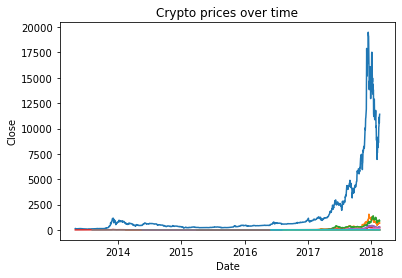

In [21]:
# For this analysis we will only be looking at closing price to make things more manageable
for coin in crypto:
    # for each dataframe plot a line plot of the Close on the y and the Date on the x. 
    sns.lineplot(x=crypto[coin].index, y='Close', data=crypto[coin])
    plt.title("Crypto prices over time") # and add a title
    

This may be a little bit hard to read. Since we will be principly working with close data, generate a Close dataframe.

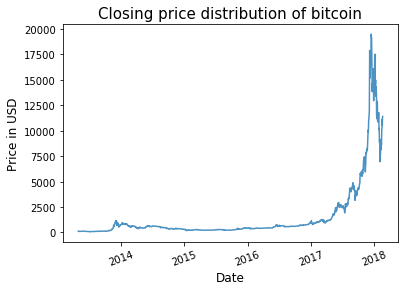

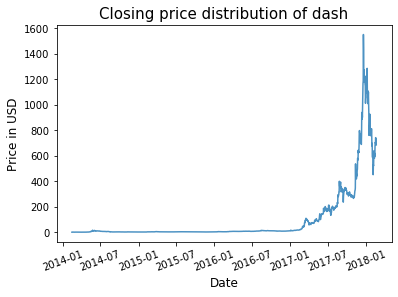

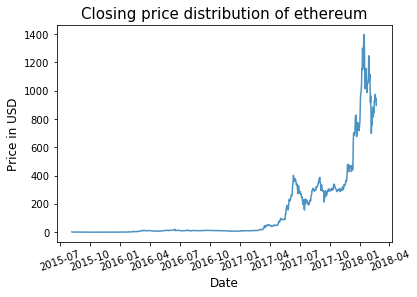

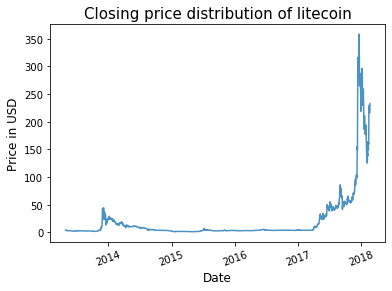

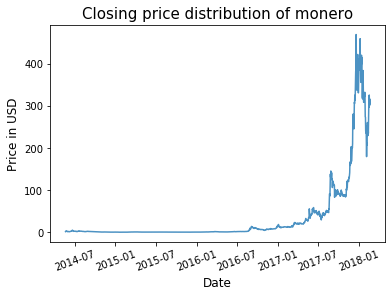

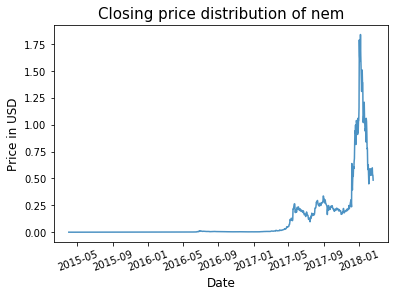

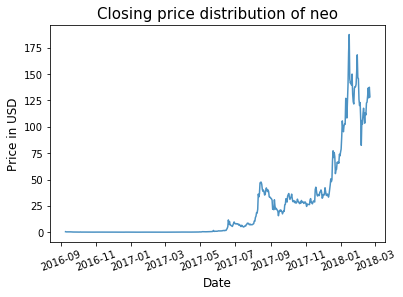

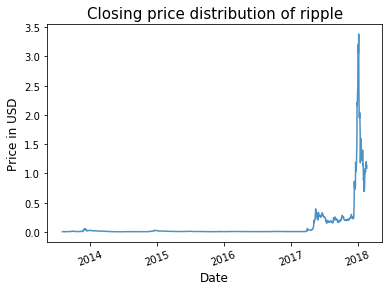

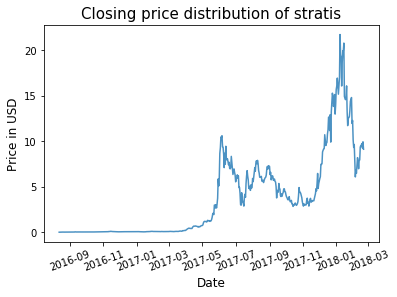

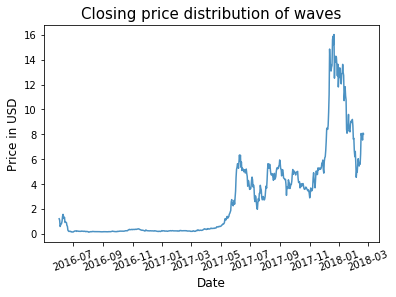

In [22]:

for coin in crypto:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.lineplot(y='Close', x=crypto[coin].index, data=crypto[coin], alpha=0.8, ax=ax) 
    plt.xlabel('Date', fontsize=12)
    plt.xticks(rotation=20)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + coin
    plt.title(title_str, fontsize=15)
    plt.show()

### Exercise: 
This is still not a great visualization. I'm sure you could do a whole lot better. Take a look at the Seaborn or Matplotlib galleries and try to better represent the cryptocurrency price data.

Consider using faceting or aesthetic properties such as color to improve this.  

#### Thought question: 
As you consider your chart, what is the most important thing that you want to communicate? Is it the different timelines, the different price values, or perhaps something else?  Perhaps you want to use another visualization property to show something else, such as what the trading volume is at each data point?

*Notes from Sarah*  
Can you specify why this isnt a great explanation? For both the challenge nad thought question, can you provide an instructor answer and/or talking points for the instructor?

### Daily Returns

As you can see up above, the higher price of bitcoin makes it look substantially different assets. But is there a way in which it might be similar? One way that we can compare different assets, is by shifting from prices to daily returns.  Because, after all, if we were to use \$100 to buy Bitcoin and \$100 to buy another coin like Ripple the daily return would affect how much each is now worth, not the price directly.  

In [13]:
# Daily Reuturn or Percent Change
for coin in crypto:
    crypto[coin]['DailyReturn'] = crypto[coin]['Close'].pct_change().fillna(0)

*Notes from Sarah*  
Make sure you're thoroughly commenting code in the code cells and you're introducing/summarizing code cells with markdown cells before/after so that learners expectations are being appropriately set

In [14]:
fig, ax = plt.subplots(figsize=(14,10))
for coin in crypto:
    sns.lineplot(x=crypto[coin].Date, y=crypto[coin]['DailyReturn'], label=coin, alpha=0.4)
plt.legend(loc=2)
plt.title('Daily Returns of Closing Prices')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Date'

Without going too far into the statistics, we can see that the daily returns are more likely to be stationary then prices are. By stationary we roughly mean that they do not have a trend that wanders off in a predictable direction.  If you are interested in learning more about stationarity, you may wish to look into the Reactor on Pairs Trading or look [here](https://en.wikipedia.org/wiki/Stationary_process)

Next let's look into the correlations of coin returns.  Correlation is a statistic that goes between -1 and 1, that describes how returns move together.  You can find more information on [Correlation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

But in order to do that, let's limit our analysis to dates that have all coins.  To go further back the meanings of correlations over different time periods get problematic.  

#### Extension question: 
For those interested in statistics, why would it be problematic to consider correlations from different historical time periods?

*Notes from Sarah*  
Please provide some talking points for instructions for answering the above question

In [15]:
# make a data set with common dates
overlap = 1000000 # we have less than 1,000,000 days in our data frame
for coin in crypto:
    overlap = min(overlap, len(crypto[coin].Close))
    print(coin, len(crypto[coin].Close))
print(f"Minimum overlap is {overlap}")

bitcoin 1760
dash 1468
ethereum 929
litecoin 1760
monero 1371
nem 1057
neo 530
ripple 1662
stratis 558
waves 629
Minimum overlap is 530


In [16]:
rets = pd.DataFrame()
for coin in crypto:
    rets[coin] = crypto[coin].tail(overlap).DailyReturn

In [17]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 530 entries, 2016-09-09 to 2018-02-20
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bitcoin   530 non-null    float64
 1   dash      530 non-null    float64
 2   ethereum  530 non-null    float64
 3   litecoin  530 non-null    float64
 4   monero    530 non-null    float64
 5   nem       530 non-null    float64
 6   neo       530 non-null    float64
 7   ripple    530 non-null    float64
 8   stratis   530 non-null    float64
 9   waves     530 non-null    float64
dtypes: float64(10)
memory usage: 45.5 KB


In [18]:
correl = rets.corr(method='pearson')
correl

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.370482,0.405018,0.447405,0.443103,0.256335,0.248041,0.168285,0.386489,0.500768
dash,0.370482,1.000000,0.421020,0.327946,0.517193,0.273844,0.230297,0.080933,0.310008,0.347569
ethereum,0.405018,0.421020,1.000000,0.376341,0.471287,0.329257,0.277608,0.168177,0.370922,0.432683
litecoin,0.447405,0.327946,0.376341,1.000000,0.379845,0.324241,0.264719,0.245333,0.309997,0.400146
monero,0.443103,0.517193,0.471287,0.379845,1.000000,0.311374,0.143716,0.188208,0.423707,0.445880
nem,0.256335,0.273844,0.329257,0.324241,0.311374,1.000000,0.189041,0.203854,0.303288,0.301198
neo,0.248041,0.230297,0.277608,0.264719,0.143716,0.189041,1.000000,0.095924,0.211811,0.280715
ripple,0.168285,0.080933,0.168177,0.245333,0.188208,0.203854,0.095924,1.000000,0.165534,0.168818
stratis,0.386489,0.310008,0.370922,0.309997,0.423707,0.303288,0.211811,0.165534,1.000000,0.455423
waves,0.500768,0.347569,0.432683,0.400146,0.445880,0.301198,0.280715,0.168818,0.455423,1.000000


While the above matrix shows us some things, such as all these coins are positively correlated, it is not easy to read.  Let's use a heatmap to guide our thinking.  

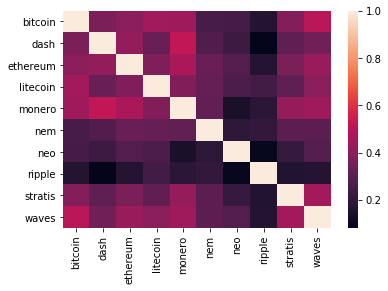

In [19]:
sns.heatmap(correl)

#### Questions
Which of these coins is least correlated with the others, and why do you think so?  There is no absolute right answer. 

#### Extension Questions
As you have time, answer these questions or formulate your own.

1. Which of these coins has the highest average daily return over this period?
2. Is that return fairly steady or is their a lot of volatility of returns?  
3. Are all coins equally volatile?  What is their range of standard deviations?
4. Which coin and time period has the [maximum drawdown](https://en.wikipedia.org/wiki/Drawdown_(economics\))?
5. Could you lessen that drawdown by investing in a blend or portfolio of coins?

*Notes from Sarah*  
Please provide an example or at least some talking points for instructors to help lead further exploration.

### References for the curious:
1. The original [bitcoin whitepaper](https://bitcoin.org/bitcoin.pdf).  It is not the easiest reading.
2. An overview of the cryptocurrency ecosystem: https://coinmarketcap.com/
3. A Microsoft blockchain [implementation](https://azure.microsoft.com/en-us/free/blockchain/)

In [20]:
Delete me
TODO: Move me {{Earlier in this section we discussed using methods such as DataFrame.info, DataFrame.head, and DataFrame.tail to examine some aspects of a DataFrame. While these methods are critical, they are on their own often insufficient to get enough information to know how to approach a new dataset. This is where exploratory statistics and visualizations for datasets come in.}}



SyntaxError: invalid syntax (<ipython-input-20-f169607ccaa5>, line 1)